Website: 
http://holowczak.com/getting-started-with-nyc-opendata-and-the-socrata-api/

Resources:

https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values

https://www.geeksforgeeks.org/creating-a-dataframe-using-csv-files/

https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/

https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/

https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://datatofish.com/replace-character-pandas-dataframe/


In [ ]:
pip install sodapy

In [ ]:
pip install pandas

In [ ]:
# import packages
import pandas as pd
import numpy as np
from sodapy import Socrata
import datetime

In [ ]:
# Extract rat sightings dataset
data_url='data.cityofnewyork.us'    # The Host Name for the API endpoint (the https:// part will be added automatically)
data_set='3q43-55fe'    # The data set at the API endpoint (311 data in this case)

# ENTER YOUR OWN APP TOKEN BETWEEN THE SINGLE QUOTES
app_token = ''   # The app token created in the prior steps

client = Socrata(data_url,app_token)      # Create the client to point to the API endpoint
# Set the timeout to 60 seconds    
client.timeout = 60
# Retrieve the first 2000 results returned as JSON object from the API
# The SoDaPy library converts this JSON object to a Python list of dictionaries
results = client.get(data_set, limit=2000)
# Convert the list of dictionaries to a Pandas data frame
df_rats = pd.DataFrame.from_records(results)
# Save the data frame to a CSV file
df_rats.to_csv("my_311_data_rats.csv")

In [ ]:
df_rats.head()

,descriptor,incident_zip,x_coordinate_state_plane_,created_date,location,city,:@computed_region_sbqj_enih,cross_street_2,:@computed_region_efsh_h5xi,park_facility_name,:@computed_region_92fq_4b7q,intersection_street_1,landmark,y_coordinate_state_plane_,agency_name,latitude,:@computed_region_yeji_bk3q,incident_address,location_type,cross_street_1,community_board,agency,park_borough,borough,street_name,complaint_type,longitude,:@computed_region_f5dn_yrer,status,unique_key,address_type,intersection_street_2,closed_date,resolution_action_updated_date
0,Rat Sighting,10025,994758,2021-11-28T01:41:56.000,"{'latitude': '40.800349055095325', 'human_addr...",NEW YORK,15,WEST 108 STREET,12422,Unspecified,23,WEST 107 STREET,COLUMBUS AVENUE,230868,Department of Health and Mental Hygiene,40.800349055095325,4,973 COLUMBUS AVENUE,3+ Family Apt. Building,WEST 107 STREET,07 MANHATTAN,DOHMH,MANHATTAN,MANHATTAN,COLUMBUS AVENUE,Rodent,-73.96204627227188,20,In Progress,52634744,ADDRESS,WEST 108 STREET,NaN,NaN
1,Rat Sighting,10025,994718,2021-11-28T01:39:47.000,"{'latitude': '40.80015148225986', 'human_addre...",NEW YORK,15,WEST 108 STREET,12422,Unspecified,23,WEST 107 STREET,COLUMBUS AVENUE,230796,Department of Health and Mental Hygiene,40.80015148225986,4,965 COLUMBUS AVENUE,3+ Family Apt. Building,WEST 107 STREET,07 MANHATTAN,DOHMH,MANHATTAN,MANHATTAN,COLUMBUS AVENUE,Rodent,-73.96219086005335,20,In Progress,52634745,ADDRESS,WEST 108 STREET,NaN,NaN
2,Rat Sighting,10002,986644,2021-11-28T01:37:24.000,"{'latitude': '40.71448290361566', 'human_addre...",NEW YORK,4,LUDLOW STREET,11723,Unspecified,32,ORCHARD STREET,DIVISION STREET,199582,Department of Health and Mental Hygiene,40.71448290361566,4,144 DIVISION STREET,Commercial Building,ORCHARD STREET,03 MANHATTAN,DOHMH,MANHATTAN,MANHATTAN,DIVISION STREET,Rodent,-73.99136427784347,70,In Progress,52635695,ADDRESS,LUDLOW STREET,NaN,NaN
3,Rat Sighting,11206,999950,2021-11-28T00:24:23.000,"{'latitude': '40.7084280768628', 'human_addres...",BROOKLYN,56,SCHOLES STREET,17213,Unspecified,30,MESEROLE STREET,GRAHAM AVENUE,197381,Department of Health and Mental Hygiene,40.7084280768628,2,192 GRAHAM AVENUE,Other (Explain Below),MESEROLE STREET,01 BROOKLYN,DOHMH,BROOKLYN,BROOKLYN,GRAHAM AVENUE,Rodent,-73.94337154055039,36,In Progress,52634784,ADDRESS,SCHOLES STREET,NaN,NaN
4,Rat Sighting,10034,1005986,2021-11-27T23:18:00.000,"{'latitude': '40.86802135915184', 'human_addre...",NEW YORK,22,COOPER STREET,13092,Unspecified,39,EILEEN SWEENEY PLACE,WEST 207 STREET,255531,Department of Health and Mental Hygiene,40.86802135915184,4,623 WEST 207 STREET,3+ Family Apt. Building,EILEEN SWEENEY PLACE,12 MANHATTAN,DOHMH,MANHATTAN,MANHATTAN,WEST 207 STREET,Rodent,-73.9214120825403,47,In Progress,52631865,ADDRESS,COOPER STREET,NaN,NaN


In [ ]:
# identify the column names in the  df
metadata = client.get_metadata(data_set)
[x['fieldName'] for x in metadata['columns']]

['unique_key',
 'created_date',
 'closed_date',
 'agency',
 'agency_name',
 'complaint_type',
 'descriptor',
 'location_type',
 'incident_zip',
 'incident_address',
 'street_name',
 'cross_street_1',
 'cross_street_2',
 'intersection_street_1',
 'intersection_street_2',
 'address_type',
 'city',
 'landmark',
 'facility_type',
 'status',
 'due_date',
 'resolution_action_updated_date',
 'community_board',
 'borough',
 'x_coordinate_state_plane_',
 'y_coordinate_state_plane_',
 'park_facility_name',
 'park_borough',
 'vehicle_type',
 'taxi_company_borough',
 'taxi_pick_up_location',
 'bridge_highway_name',
 'bridge_highway_direction',
 'road_ramp',
 'bridge_highway_segment',
 'latitude',
 'longitude',
 'location',
 ':@computed_region_efsh_h5xi',
 ':@computed_region_f5dn_yrer',
 ':@computed_region_yeji_bk3q',
 ':@computed_region_92fq_4b7q',
 ':@computed_region_sbqj_enih']

In [ ]:
# Extract unsanitary conditions dataset
data_url='data.cityofnewyork.us'    # The Host Name for the API endpoint (the https:// part will be added automatically)
data_set='erm2-nwe9'    # The data set at the API endpoint (311 data in this case)
# app_token=''   # The app token created in the prior steps
client = Socrata(data_url,app_token)      # Create the client to point to the API endpoint
# Set the timeout to 60 seconds    
client.timeout = 60
# Retrieve the first 1000 results returned as JSON object from the API
# The SoDaPy library converts this JSON object to a Python list of dictionaries
results = client.get(data_set, complaint_type = 'UNSANITARY CONDITION' 
                     or 'Dirty Conditions'
                     or 'Dirty Condition', limit=1000)
# Convert the list of dictionaries to a Pandas data frame
df_unsanitary_conditions = pd.DataFrame.from_records(results)
# Save the data frame to a CSV file
df_unsanitary_conditions.to_csv("my_311_data_unsanitary.csv")

In [ ]:
df_unsanitary_conditions.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,address_type,city,status,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,facility_type
0,50673490,2021-05-25T09:38:48.000,2021-06-10T16:48:02.000,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,GARBAGE/RECYCLING STORAGE,RESIDENTIAL BUILDING,11103,32-15 41 STREET,41 STREET,ADDRESS,Astoria,Closed,The Department of Housing Preservation and Dev...,2021-06-10T00:00:00.000,01 QUEENS,4006770030,QUEENS,1006792,215465,PHONE,Unspecified,QUEENS,40.758049402516846,-73.91863249788604,"{'latitude': '40.758049402516846', 'longitude'...",NaN
1,50674291,2021-05-25T14:56:54.000,2021-06-04T16:41:04.000,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10468,2401 DAVIDSON AVENUE,DAVIDSON AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,2021-06-04T00:00:00.000,07 BRONX,2031990038,BRONX,1011061,253220,ONLINE,Unspecified,BRONX,40.86166441278946,-73.9030723500759,"{'latitude': '40.86166441278946', 'longitude':...",NaN
2,50674292,2021-05-25T11:15:23.000,2021-06-08T18:42:51.000,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10457,2100 ANTHONY AVENUE,ANTHONY AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,2021-06-08T00:00:00.000,05 BRONX,2031560136,BRONX,1011487,250268,PHONE,Unspecified,BRONX,40.85356075807185,-73.90154426289172,"{'latitude': '40.85356075807185', 'longitude':...",NaN
3,50674300,2021-05-25T14:17:29.000,2021-06-09T10:46:05.000,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10460,1941 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,2021-06-09T00:00:00.000,06 BRONX,2029600073,BRONX,1015859,246159,PHONE,Unspecified,BRONX,40.84226820453441,-73.8857598362832,"{'latitude': '40.84226820453441', 'longitude':...",NaN
4,50674370,2021-05-25T18:56:31.000,2021-06-09T02:03:37.000,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10458,2465 CROTONA AVENUE,CROTONA AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,2021-06-09T00:00:00.000,06 BRONX,2031050034,BRONX,1016662,250984,PHONE,Unspecified,BRONX,40.855508481763664,-73.8828343399938,"{'latitude': '40.855508481763664', 'longitude'...",NaN


In [ ]:
# Fix the date to be in format MM/DD/YYYY
def changeDate(df, *argv):
  for x in argv:
    df[x] = df[x].str.replace('-','/')
    df[x]=pd.to_datetime(df[x], errors='coerce')
    nulls=df[x][df[x].notnull()==False]
    df[x] = df[x].dt.strftime('%m/%d/%Y')

In [ ]:
# Using function to change date format for both dataframes

# rats
changeDate(df_rats, 'created_date', 'closed_date')

# unsanitary
changeDate(df_unsanitary_conditions, 'created_date', 'closed_date')

In [ ]:
df_rats.head()

,descriptor,incident_zip,x_coordinate_state_plane_,created_date,location,city,:@computed_region_sbqj_enih,cross_street_2,:@computed_region_efsh_h5xi,park_facility_name,:@computed_region_92fq_4b7q,intersection_street_1,landmark,y_coordinate_state_plane_,agency_name,latitude,:@computed_region_yeji_bk3q,incident_address,location_type,cross_street_1,community_board,agency,park_borough,borough,street_name,complaint_type,longitude,:@computed_region_f5dn_yrer,status,unique_key,address_type,intersection_street_2,closed_date,resolution_action_updated_date
0,Rat Sighting,10025,994758,11/28/2021,"{'latitude': '40.800349055095325', 'human_addr...",NEW YORK,15,WEST 108 STREET,12422,Unspecified,23,WEST 107 STREET,COLUMBUS AVENUE,230868,Department of Health and Mental Hygiene,40.800349055095325,4,973 COLUMBUS AVENUE,3+ Family Apt. Building,WEST 107 STREET,07 MANHATTAN,DOHMH,MANHATTAN,MANHATTAN,COLUMBUS AVENUE,Rodent,-73.96204627227188,20,In Progress,52634744,ADDRESS,WEST 108 STREET,NaN,NaN
1,Rat Sighting,10025,994718,11/28/2021,"{'latitude': '40.80015148225986', 'human_addre...",NEW YORK,15,WEST 108 STREET,12422,Unspecified,23,WEST 107 STREET,COLUMBUS AVENUE,230796,Department of Health and Mental Hygiene,40.80015148225986,4,965 COLUMBUS AVENUE,3+ Family Apt. Building,WEST 107 STREET,07 MANHATTAN,DOHMH,MANHATTAN,MANHATTAN,COLUMBUS AVENUE,Rodent,-73.96219086005335,20,In Progress,52634745,ADDRESS,WEST 108 STREET,NaN,NaN
2,Rat Sighting,10002,986644,11/28/2021,"{'latitude': '40.71448290361566', 'human_addre...",NEW YORK,4,LUDLOW STREET,11723,Unspecified,32,ORCHARD STREET,DIVISION STREET,199582,Department of Health and Mental Hygiene,40.71448290361566,4,144 DIVISION STREET,Commercial Building,ORCHARD STREET,03 MANHATTAN,DOHMH,MANHATTAN,MANHATTAN,DIVISION STREET,Rodent,-73.99136427784347,70,In Progress,52635695,ADDRESS,LUDLOW STREET,NaN,NaN
3,Rat Sighting,11206,999950,11/28/2021,"{'latitude': '40.7084280768628', 'human_addres...",BROOKLYN,56,SCHOLES STREET,17213,Unspecified,30,MESEROLE STREET,GRAHAM AVENUE,197381,Department of Health and Mental Hygiene,40.7084280768628,2,192 GRAHAM AVENUE,Other (Explain Below),MESEROLE STREET,01 BROOKLYN,DOHMH,BROOKLYN,BROOKLYN,GRAHAM AVENUE,Rodent,-73.94337154055039,36,In Progress,52634784,ADDRESS,SCHOLES STREET,NaN,NaN
4,Rat Sighting,10034,1005986,11/27/2021,"{'latitude': '40.86802135915184', 'human_addre...",NEW YORK,22,COOPER STREET,13092,Unspecified,39,EILEEN SWEENEY PLACE,WEST 207 STREET,255531,Department of Health and Mental Hygiene,40.86802135915184,4,623 WEST 207 STREET,3+ Family Apt. Building,EILEEN SWEENEY PLACE,12 MANHATTAN,DOHMH,MANHATTAN,MANHATTAN,WEST 207 STREET,Rodent,-73.9214120825403,47,In Progress,52631865,ADDRESS,COOPER STREET,NaN,NaN


In [ ]:
df_unsanitary_conditions.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,address_type,city,status,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,facility_type
0,50673490,05/25/2021,06/10/2021,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,GARBAGE/RECYCLING STORAGE,RESIDENTIAL BUILDING,11103,32-15 41 STREET,41 STREET,ADDRESS,Astoria,Closed,The Department of Housing Preservation and Dev...,2021-06-10T00:00:00.000,01 QUEENS,4006770030,QUEENS,1006792,215465,PHONE,Unspecified,QUEENS,40.758049402516846,-73.91863249788604,"{'latitude': '40.758049402516846', 'longitude'...",NaN
1,50674291,05/25/2021,06/04/2021,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10468,2401 DAVIDSON AVENUE,DAVIDSON AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,2021-06-04T00:00:00.000,07 BRONX,2031990038,BRONX,1011061,253220,ONLINE,Unspecified,BRONX,40.86166441278946,-73.9030723500759,"{'latitude': '40.86166441278946', 'longitude':...",NaN
2,50674292,05/25/2021,06/08/2021,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10457,2100 ANTHONY AVENUE,ANTHONY AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,2021-06-08T00:00:00.000,05 BRONX,2031560136,BRONX,1011487,250268,PHONE,Unspecified,BRONX,40.85356075807185,-73.90154426289172,"{'latitude': '40.85356075807185', 'longitude':...",NaN
3,50674300,05/25/2021,06/09/2021,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10460,1941 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,2021-06-09T00:00:00.000,06 BRONX,2029600073,BRONX,1015859,246159,PHONE,Unspecified,BRONX,40.84226820453441,-73.8857598362832,"{'latitude': '40.84226820453441', 'longitude':...",NaN
4,50674370,05/25/2021,06/09/2021,HPD,Department of Housing Preservation and Develop...,UNSANITARY CONDITION,PESTS,RESIDENTIAL BUILDING,10458,2465 CROTONA AVENUE,CROTONA AVENUE,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,2021-06-09T00:00:00.000,06 BRONX,2031050034,BRONX,1016662,250984,PHONE,Unspecified,BRONX,40.855508481763664,-73.8828343399938,"{'latitude': '40.855508481763664', 'longitude'...",NaN


In [ ]:
# There are about this many rat complaints in Manhattan
df_rats['descriptor'].value_counts()

Rat Sighting    2000
Name: descriptor, dtype: int64

In [ ]:
# There are about this many unsanitary condition complaints 
df_unsanitary_conditions['descriptor'].value_counts()

PESTS                        504
MOLD                         286
GARBAGE/RECYCLING STORAGE    178
SEWAGE                        32
Name: descriptor, dtype: int64

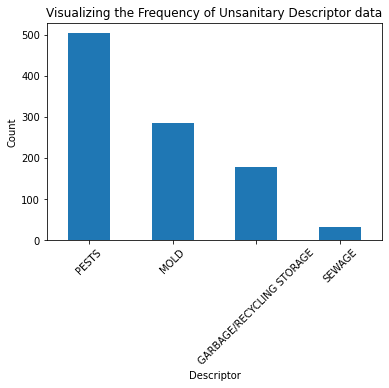

In [ ]:
# Visualize unsanitary condition complaints using matplotlib

# import the library
import matplotlib.pyplot as plt

# plt.figure(figsize=(25, 4)) 
df_unsanitary_conditions['descriptor'].value_counts().plot.bar()
plt.title("Visualizing the Frequency of Unsanitary Descriptor data")
plt.xlabel("Descriptor")
plt.xticks(rotation = 45)
plt.ylabel("Count")
plt.grid(False)
plt.show()